In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import metrics

sns.set_style("darkgrid")
sns.set_palette("rocket")


Status: ülke gelişiyor mu gelişmiş mi

Life expectancy: ülkede beklenen ortalama yaşam süresi

Adult mortality: her 1000 kişiden 15-60 yaşları arası ölenlerin olasılığı

infant death : her 1000 popülasyonda ölen underage sayısı

Alcohol:kişi başına kaydedilen tüketim alkol

percentage expenditure:kişi başı sağlık harcaması yüzdelik olarak

Hepatitis B: hepatit B aşı yüzdeliği(1 yaşındakiler için)

Measles: 1000 kişiden kaçında kızamık var

BMI: vücut kitle indeksi ortalama

under-five deaths: her 1000 popülasyondan kaçı 5 yaş altı ölmüş

Polio: çocuk felci aşı yüzdeliği(1 yaş için)

Total expenditure: hükümetin sağlık hizmeti harcaması % lik olarak

HIV/AIDS : her 1000 kişiden kaçı hıoc/aids ten ölmüş doğduktan sonra (0-4 yas arası)

GDP: kişi başı hasılat dolar üzerinden

Population : nüfus

thinnes 1-19: 10-19 yas arası cocukların zayıflık oranı

thinness 5-9 years: 5-9 yas arası cocuklarda zayıflık

Income composition of resources: ?????


Schooling : kaç sene okumuş bunlar ??


In [3]:
data = pd.read_csv("Life_Expectancy_Data.csv")

In [4]:
data.head(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

3 4 6 8 9 10 12 13 14 16 17 18 19 20 21 bu satırlarda eksik veri var

In [6]:
data.duplicated().any()

False

In [7]:
data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [8]:
data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [9]:
data.columns = data.columns.str.strip()   #bas ve son boslukları sil column namelerde

In [10]:
def count_plot(x_axis = None, y_axis = None, hue = None, rotation = 0, top = None):
    if x_axis:
        order = train[x_axis].value_counts().iloc[:top].index
    
    else : 
        order = train[y_axis].value_counts().iloc[:top].index

    graph = sns.countplot(x = x_axis, y = y_axis, data = train, hue = hue, order = order)
    for container in graph.containers:
        graph.bar_label(container)

    plt.xticks(rotation = rotation)
    plt.show()

In [11]:
def pie_plot(column_name):
    
    plt.pie(data[column_name].value_counts(), labels = data[column_name].value_counts().index, shadow = True, autopct = "%1.1f%%")
    plt.show()

In [12]:
def histogram(column_name):
    
    # 1- set figure size
    plt.figure(figsize=(15, 20))

    # 2- loop over services list to plot columns
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) # create sub-plot

        sns.histplot(x = col, data = train, kde = True)
        
        plt.title(col) # set title to each plot
        plt.xlabel("") # replace x label with empty string
        plt.ylabel("") # replace y label with empty string

    # 3- set layout between two plots
    plt.tight_layout(pad = 2)

    plt.show()

In [13]:
def box_plot(x_axis = None, y_axis = None):
   
    sns.boxplot(x = x_axis, y = y_axis, data = train)
    plt.xlabel(x_axis)
    plt.ylabel("FRQ")
    plt.show()

In [14]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2,random_state=42)

In [15]:
print(f"shape of train data : {train.shape}")
print(f"Shape of test data : {test.shape}")

shape of train data : (2350, 22)
Shape of test data : (588, 22)


%80 e %20

In [16]:
train["Country"].nunique()

191

In [17]:
train["Country"].unique()

array(['Cabo Verde', 'Saint Lucia', 'Tunisia', 'Brunei Darussalam',
       'Equatorial Guinea', 'Papua New Guinea', 'Ecuador', 'Mongolia',
       'Poland', 'Oman', 'Senegal', 'Kuwait', 'Sierra Leone',
       'Saudi Arabia', 'India', 'Chad', 'Guinea-Bissau', 'Mauritius',
       'Ghana', 'Solomon Islands', 'Ireland', 'Israel', 'Fiji',
       'Uzbekistan', 'France', 'Malaysia', 'Singapore', "Côte d'Ivoire",
       'El Salvador', 'Belarus', 'Luxembourg', 'Armenia', 'Turkmenistan',
       'Bahamas', 'Belgium', 'Nicaragua', 'Lesotho',
       'Iran (Islamic Republic of)', 'Dominican Republic', 'Liberia',
       'Serbia', 'Denmark', 'Netherlands', 'Kyrgyzstan', 'Slovenia',
       'Kazakhstan', 'Azerbaijan', 'Nepal', 'Montenegro',
       'Democratic Republic of the Congo', 'Mali',
       'United Kingdom of Great Britain and Northern Ireland',
       'Bolivia (Plurinational State of)', 'South Sudan', 'Finland',
       'Cyprus', 'Uruguay', 'Belize', 'United Republic of Tanzania',
       'Madagasc

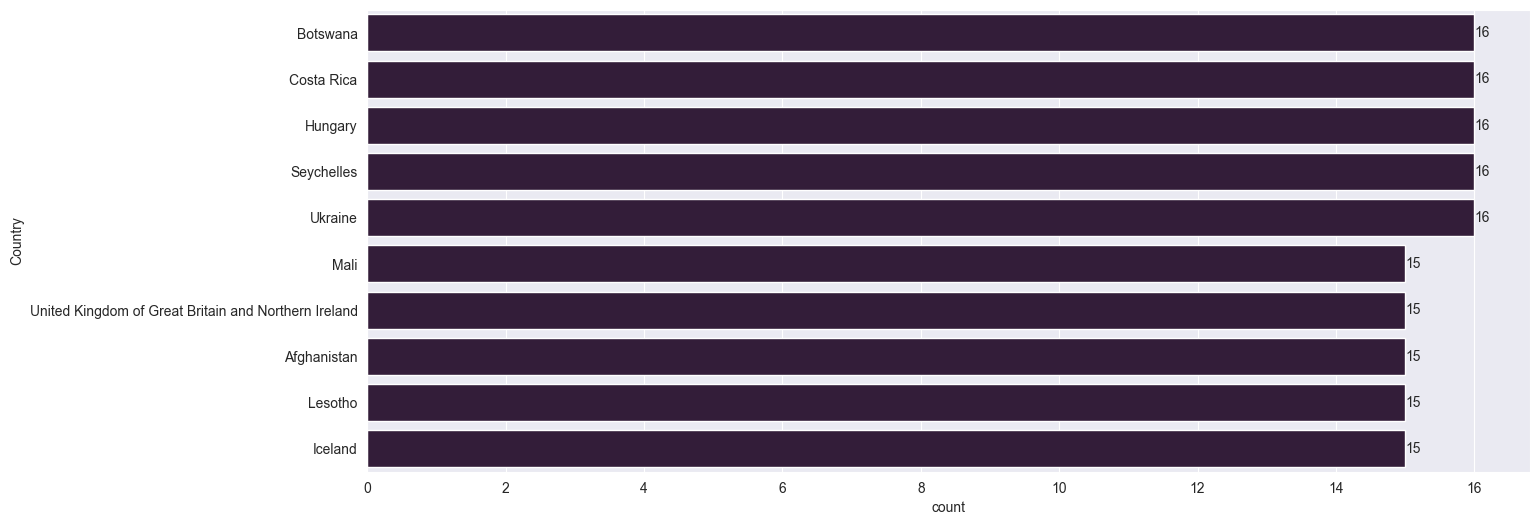

In [18]:
plt.figure(figsize=(15,6))

count_plot(y_axis= "Country", top=10)

In [19]:
train["Year"].unique()

array([2007, 2001, 2011, 2013, 2002, 2003, 2004, 2015, 2012, 2005, 2014,
       2000, 2008, 2009, 2006, 2010], dtype=int64)

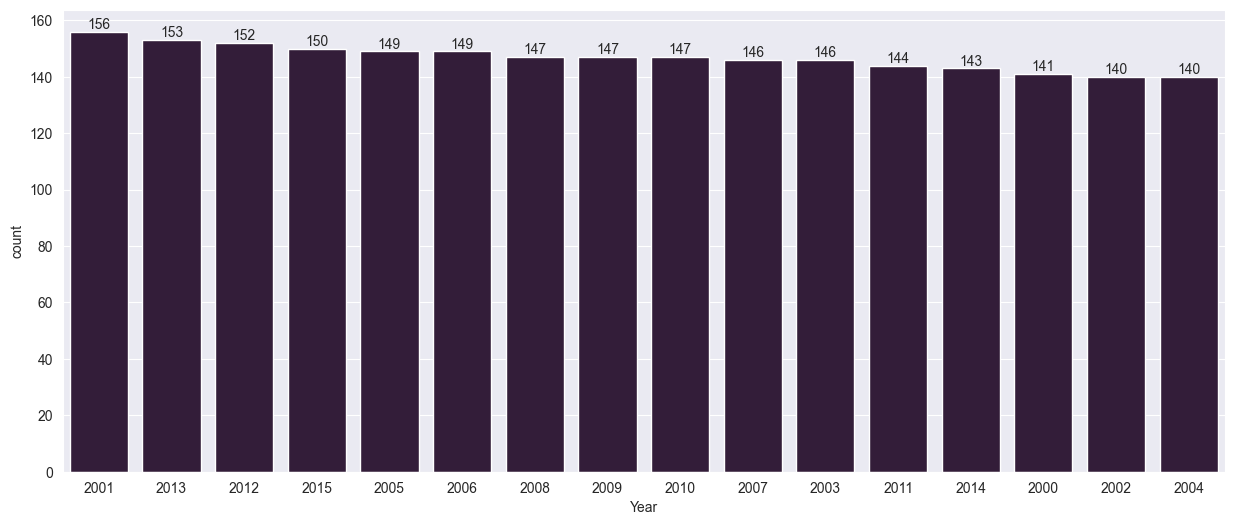

In [20]:
plt.figure(figsize = (15,6))

count_plot(x_axis = "Year") 

In [21]:
train["Status"].unique()

array(['Developing', 'Developed'], dtype=object)

burda en iyi pie chart çalışır

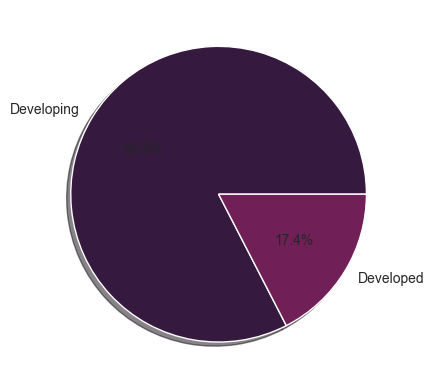

In [22]:
pie_plot("Status")

In [23]:
train.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      8
Adult Mortality                      8
infant deaths                        0
Alcohol                            158
percentage expenditure               0
Hepatitis B                        439
Measles                              0
BMI                                 27
under-five deaths                    0
Polio                               14
Total expenditure                  185
Diphtheria                          14
HIV/AIDS                             0
GDP                                345
Population                         516
thinness  1-19 years                27
thinness 5-9 years                  27
Income composition of resources    131
Schooling                          129
dtype: int64

In [24]:
test.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      2
Adult Mortality                      2
infant deaths                        0
Alcohol                             36
percentage expenditure               0
Hepatitis B                        114
Measles                              0
BMI                                  7
under-five deaths                    0
Polio                                5
Total expenditure                   41
Diphtheria                           5
HIV/AIDS                             0
GDP                                103
Population                         136
thinness  1-19 years                 7
thinness 5-9 years                   7
Income composition of resources     36
Schooling                           34
dtype: int64

In [25]:
def fill_train_with_median():
    return train.fillna(train.median(numeric_only=True))

def fill_test_with_median():
    return test.fillna(test.median(numeric_only=True))

train = fill_train_with_median()
test = fill_test_with_median()

traindeki boşlukları trainden aldığımız medyanlarla testteki bşlukları testten adlığımız medyanlarla dolduruyoruz

In [26]:
train.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

In [27]:
test.isna().any()

Country                            False
Year                               False
Status                             False
Life expectancy                    False
Adult Mortality                    False
infant deaths                      False
Alcohol                            False
percentage expenditure             False
Hepatitis B                        False
Measles                            False
BMI                                False
under-five deaths                  False
Polio                              False
Total expenditure                  False
Diphtheria                         False
HIV/AIDS                           False
GDP                                False
Population                         False
thinness  1-19 years               False
thinness 5-9 years                 False
Income composition of resources    False
Schooling                          False
dtype: bool

test ve train datasetinde boşluk olup olmadığını kontrol ettik ve boşluk olmadığpını gördük

In [28]:
numerical_colum = train.select_dtypes(exclude=object).columns.tolist()
numerical_colum.remove("Year")

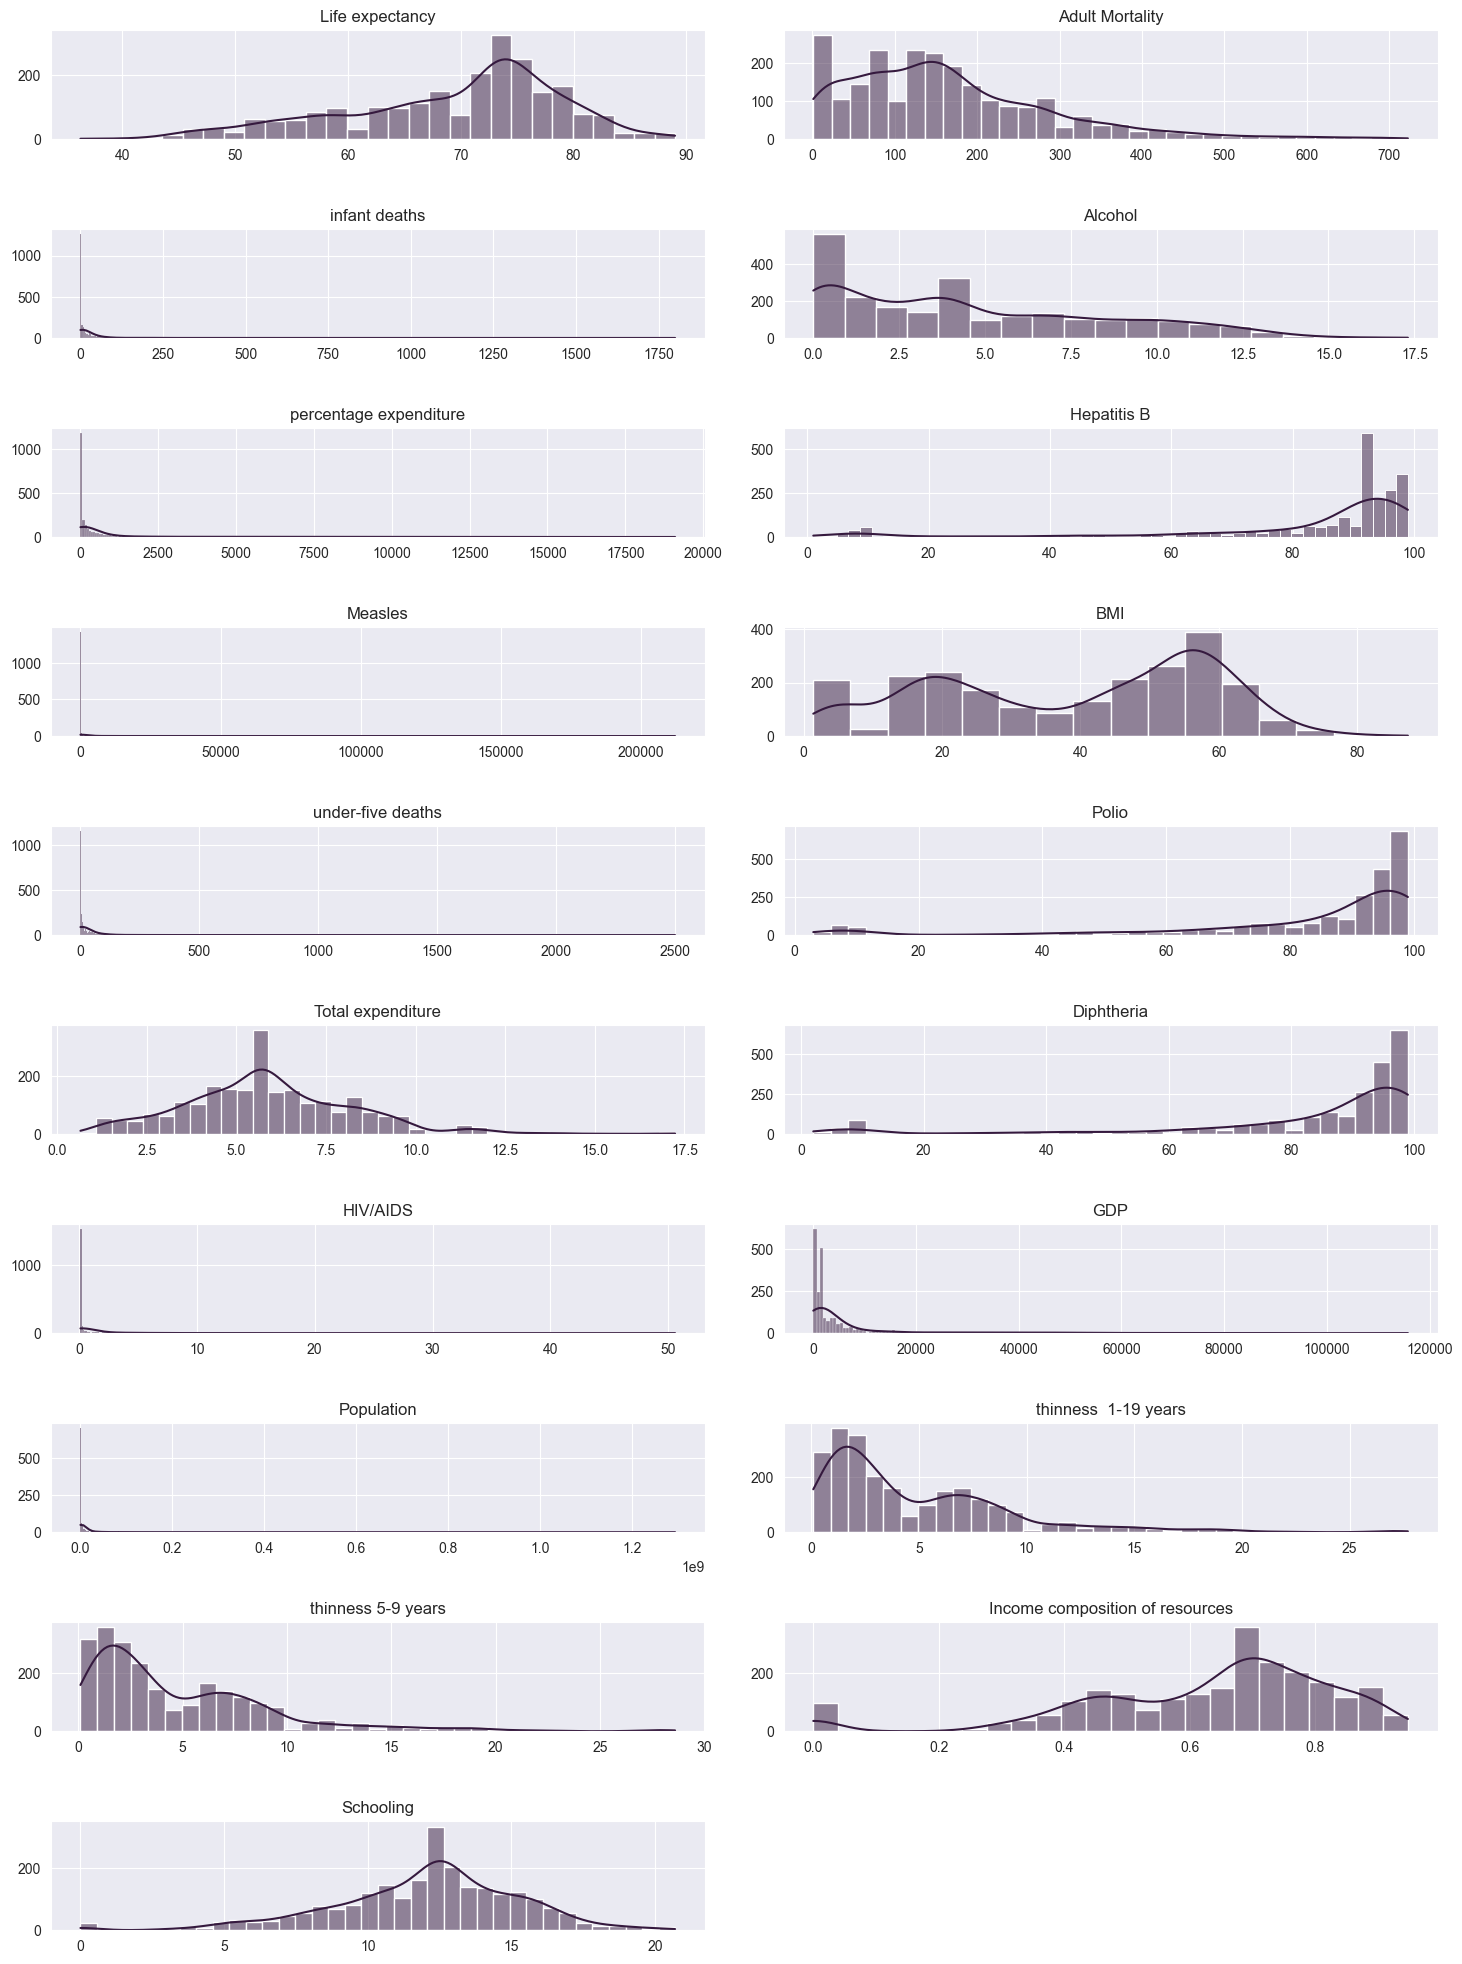

In [29]:
histogram(numerical_colum)

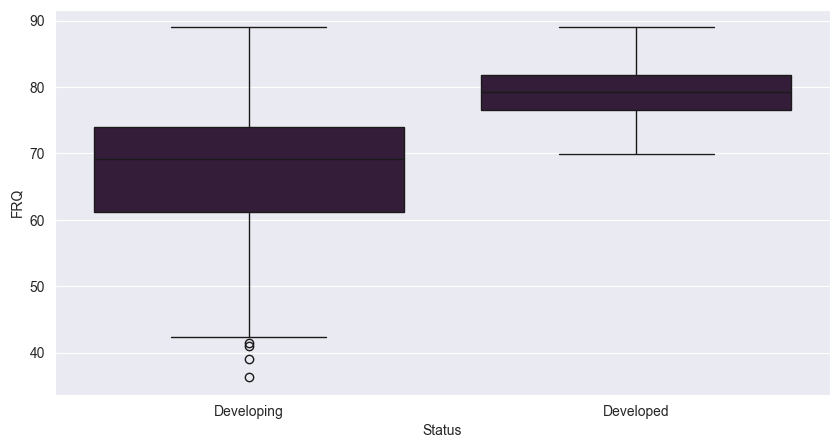

In [30]:
plt.figure(figsize=(10,5))

box_plot(x_axis="Status", y_axis="Life expectancy")

In [31]:
def country_Life_expectancy(reversed, top = None):
    return train.groupby("Country")["Life expectancy"].median().sort_values(ascending = reversed).reset_index().head(top)

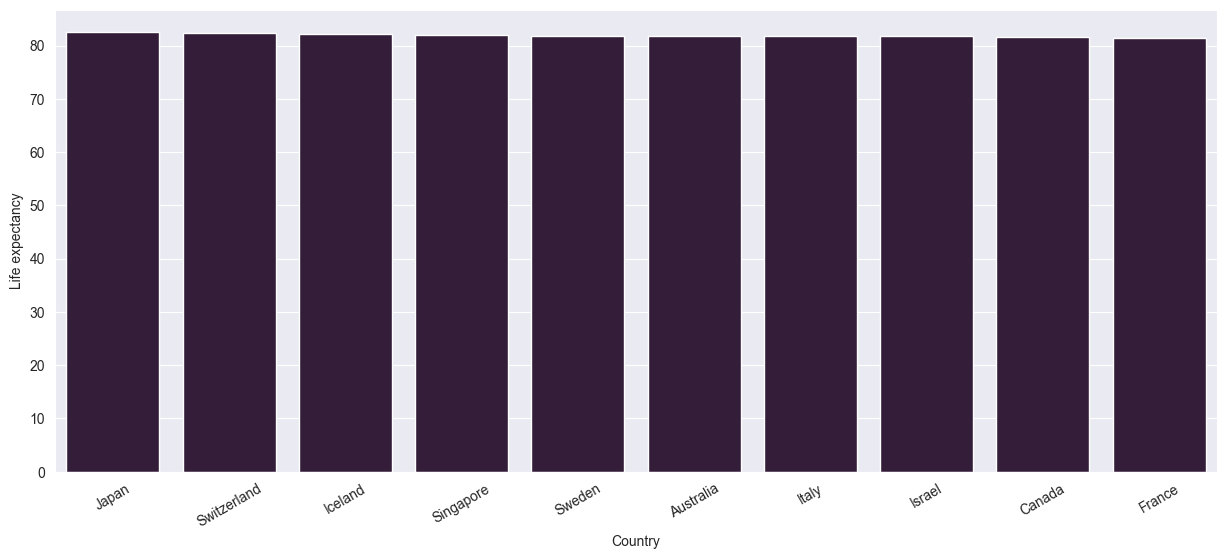

In [32]:
country = country_Life_expectancy(reversed = False, top = 10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Country', y = 'Life expectancy', data = country)

plt.xticks(rotation = 30)

plt.show()

en uzun yaşayan 10 ülke

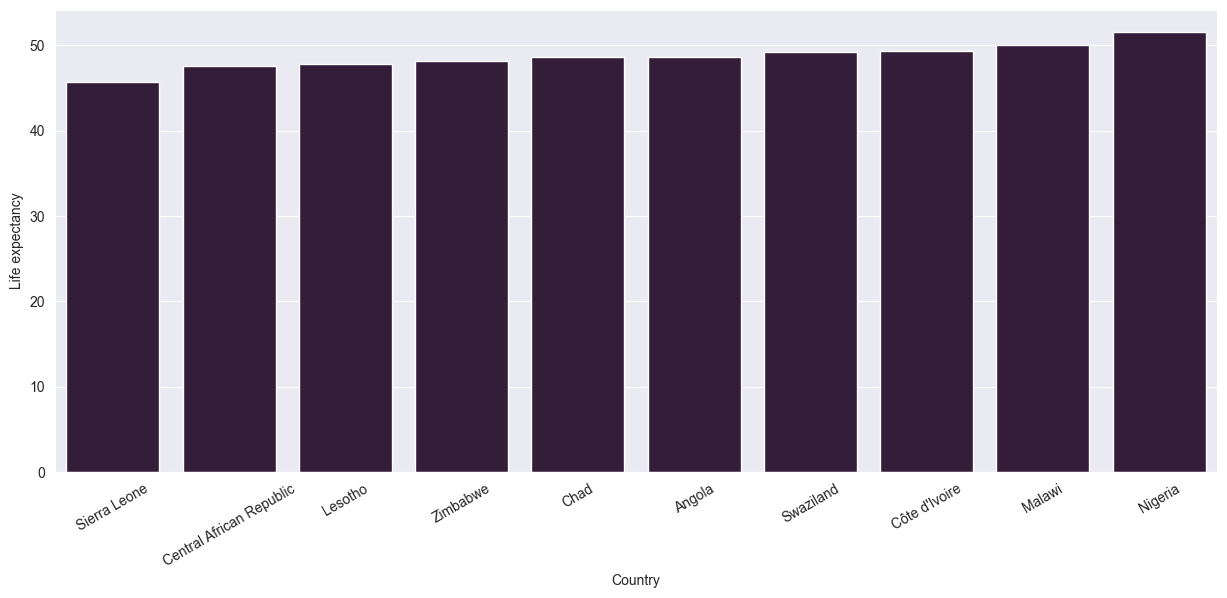

In [33]:
country = country_Life_expectancy(reversed = True, top = 10)

plt.figure(figsize=(15, 6))
sns.barplot(x = 'Country', y = 'Life expectancy', data = country)

plt.xticks(rotation = 30)

plt.show()

en az yaşayan 10 ülke

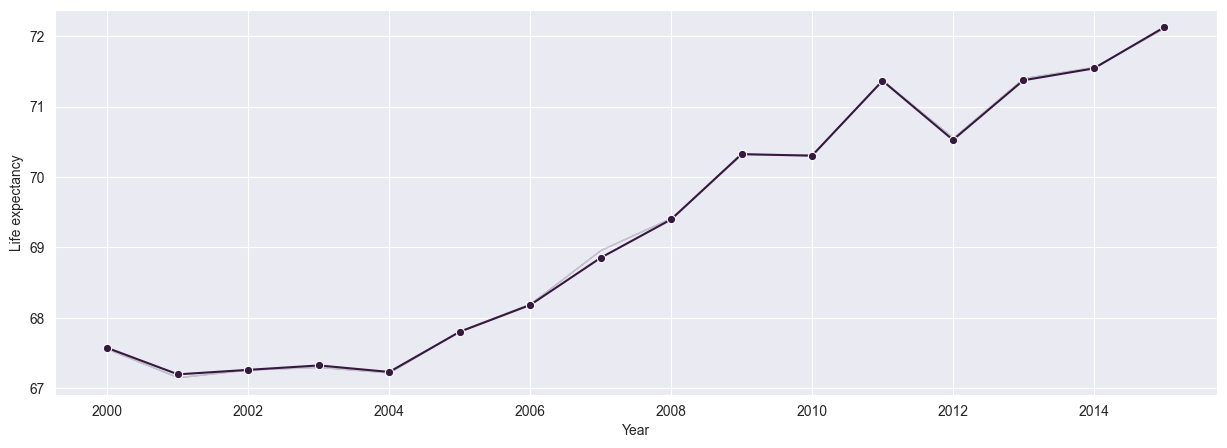

In [34]:
plt.figure(figsize=(15,5))

sns.lineplot(x = 'Year', y = 'Life expectancy', data = train, marker = 'o' ,errorbar=('ci', False))
plt.show()

yıla göre beklenen yaşam süresi grafiği

In [35]:
numerical_colum.remove("Life expectancy")    #grafiği gözükmesin diye life expectancy cıkarıyorum

In [36]:
def create_scatterplot(x_axis, column_name):
    
   
    plt.figure(figsize=(15, 20))

    
    for index, col in enumerate(column_name):
        plt.subplot((len(column_name) + 1) // 2, 2, index + 1) 
    
        sns.scatterplot(x = x_axis, y = col, data = data)
        
        plt.title(col) 
        # plt.xlabel("")
        # plt.ylabel("") 

    plt.tight_layout(pad = 2)

    plt.show()

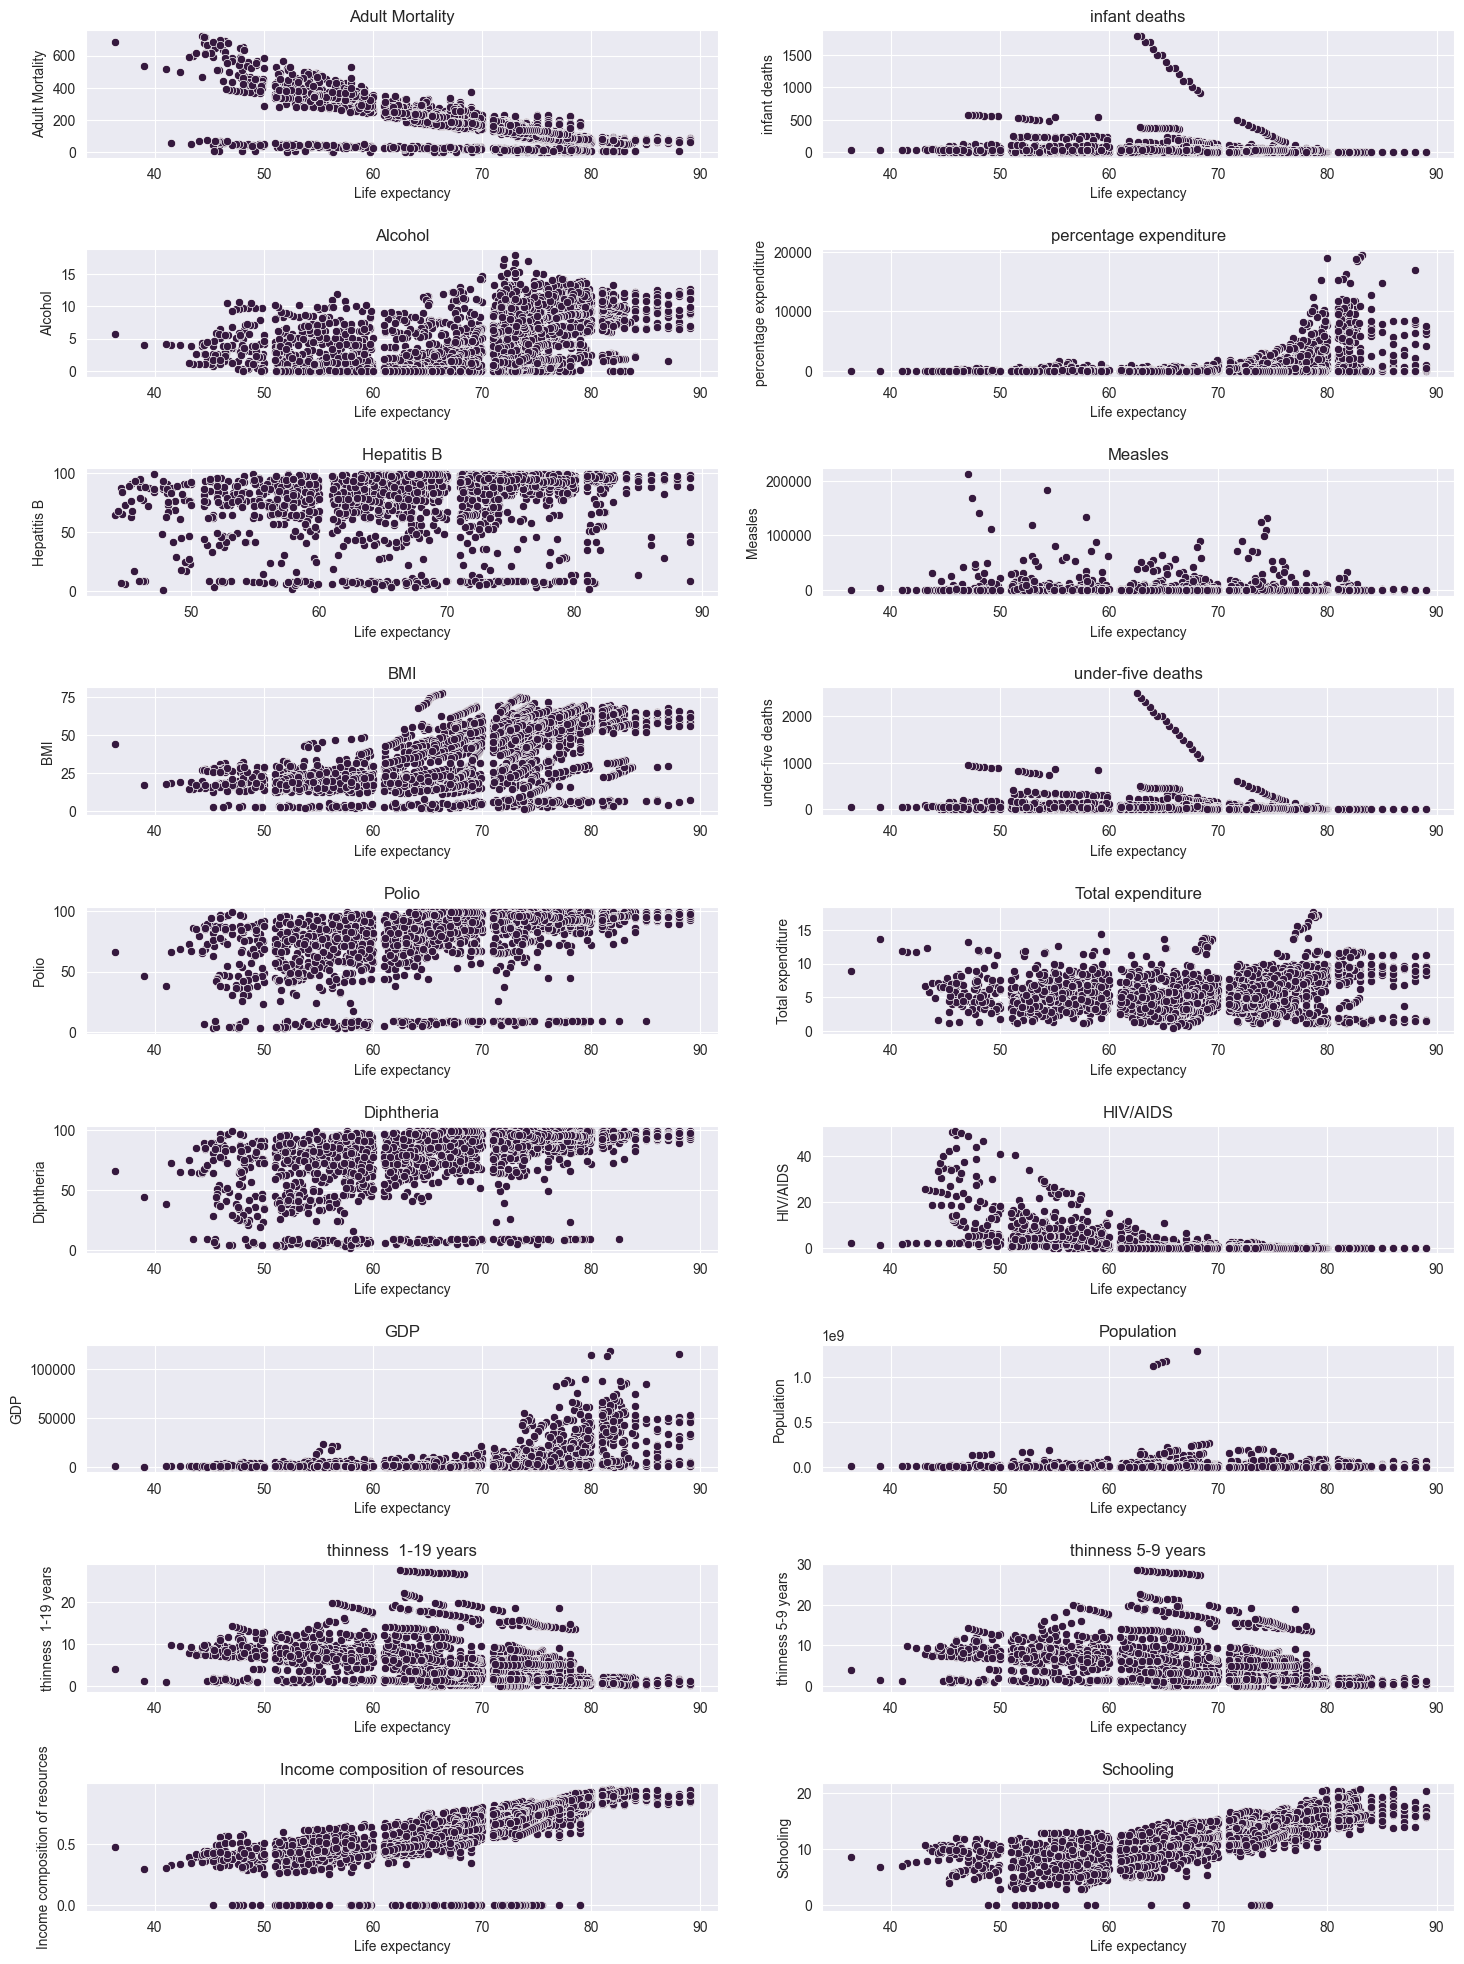

In [37]:
create_scatterplot("Life expectancy", numerical_colum) 

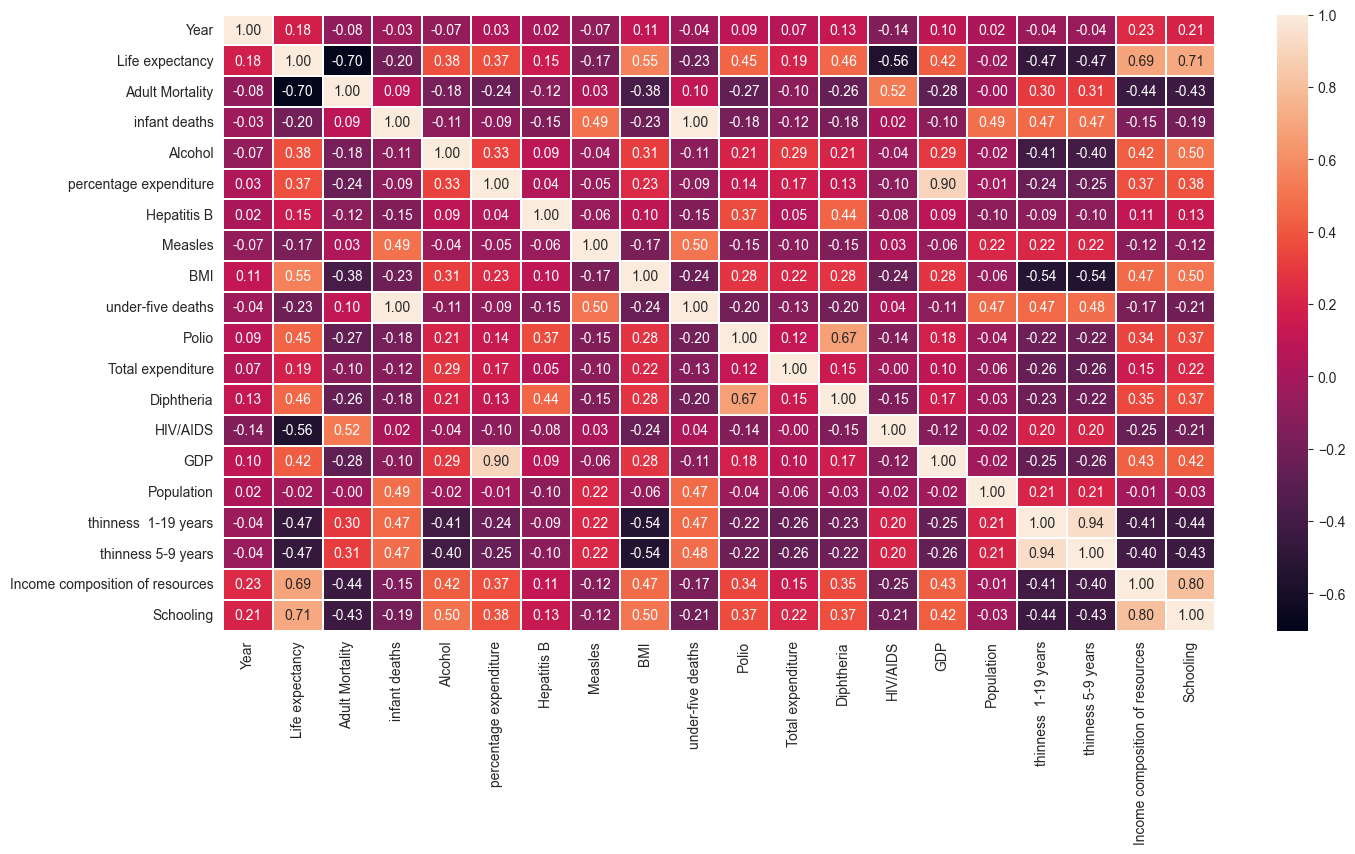

In [38]:
plt.figure(figsize = (16,8))
sns.heatmap(train.select_dtypes(exclude = object).corr(), annot = True, fmt = ".2f", linewidths = 0.2)
plt.show()

Şimdi data preprocessing kısmına geçilecek

ındependent dependend variable lar bulunacak

encoder min max scale kullanılacak

train ve test seti ındependent ve dependent variablelara göre eğitilecek

min max scaler ile veriler scale edilmeli(normalizasyon)

train ve test r2 scorları karşılaştırtıalcak en son olarak

incelemeyi düşündüğüm modeller :

    linear regression
    random forest
    gradient boosting 
    support vector regresion
    decision tree


dependend:
    
    life expectancy

independent: 
    
    HIV/AIDS(-0.56) kesin kullanılacak, 
    Income composition of resources(0.69) ????, 
    Adult Mortality(-0.70) kesin kullanılacak, 
    BMI(0.55)????, 
    under-five deaths(-0.23)????, 
    alcohol(0.38)????

    hepsini al independent

In [39]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error,r2_score, roc_auc_score, roc_curve, classification_report

In [40]:
encoder = LabelEncoder()

for column in ["Country", "Status"]:
    train[column] = encoder.fit_transform(train[column])
    test[column] = encoder.fit_transform(test[column])

In [41]:
train.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
330,20,2005,1,75.0,12.0,0,4.56,45.713543,93.0,23,...,95.0,8.50,93.0,0.1,2968.411860,378153.0,2.9,2.9,0.000,12.5
10,0,2005,1,57.3,291.0,85,0.02,1.388648,66.0,1296,...,58.0,8.70,58.0,0.1,25.294130,257798.0,19.3,19.5,0.396,7.9
1155,74,2014,0,75.6,137.0,0,0.01,160.944934,92.0,0,...,99.0,7.40,99.0,0.1,14117.976680,9866468.0,1.7,1.6,0.834,15.8
1954,127,2003,1,63.5,185.0,366,0.01,24.234557,63.0,4740,...,69.0,2.61,67.0,0.1,563.594342,1477341.0,21.6,22.0,0.465,5.6
2774,180,2003,0,78.3,86.0,4,11.85,0.000000,92.0,460,...,91.0,7.81,91.0,0.1,1774.929100,1416447.5,0.7,0.5,0.682,12.4


In [42]:
test.sample(5)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1005,60,2004,0,79.1,86.0,3,11.83,5842.374765,88.0,121,...,96.0,1.37,96.0,0.1,34165.934300,8251626.0,1.1,1.1,0.8770,16.4
2254,138,2010,1,64.3,212.0,21,0.28,1.020072,89.0,428,...,76.0,4.62,89.0,0.4,11.631377,12916229.0,1.4,1.3,0.4490,7.7
2611,159,2005,1,63.7,26.0,3,0.36,7.127145,92.0,203,...,55.0,1.50,55.0,0.1,478.331859,126484.0,12.0,11.9,0.4920,10.6
1036,62,2005,1,79.3,81.0,0,9.95,2785.139364,93.0,122,...,96.0,9.36,96.0,0.1,22551.735740,1987314.0,0.8,0.7,0.8390,15.6
700,40,2004,0,75.8,116.0,0,13.24,0.000000,98.0,17,...,96.0,6.90,98.0,0.1,1741.142552,1323675.5,2.1,2.2,0.6565,12.1


In [43]:
# Train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths','Alcohol']]
Train = train[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
Target = train["Life expectancy"]

In [44]:
# x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths','Alcohol']]
x_test = test[['HIV/AIDS', 'Income composition of resources', 'Adult Mortality', 'BMI', 'under-five deaths']]
y_test = test["Life expectancy"]

In [45]:
scaler = MinMaxScaler()

Train= scaler.fit_transform(Train)
x_test= scaler.transform(x_test)

In [46]:
Modeling = pd.DataFrame(columns=['Model', 'Training Score', 'Test R2 Score'])

# Define the model selection function
def select_model(model_name):
    global Modeling 

    model = model_name
    
    model.fit(Train, Target)

    train_score = model.score(Train, Target)
    print(f"Score of the {model_name} model on the training data is: {train_score}")

    predictions = np.round(model.predict(x_test), decimals = 1)
    
    test_r2_score = r2_score(y_test, predictions)
    
    print(f"R2 score of the {model_name} model on the test data is: {test_r2_score}")

    model_scores = pd.DataFrame({'Model': [model_name], 'Training Score': [train_score], 'Test R2 Score': [test_r2_score]})

    Modeling = pd.concat([Modeling, model_scores], ignore_index = True)

    
    

In [47]:
select_model(LinearRegression())

Score of the LinearRegression() model on the training data is: 0.7506349546873065
R2 score of the LinearRegression() model on the test data is: 0.7234233012076152


C:\Users\Casper\AppData\Local\Temp\ipykernel_14948\371720637.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  Modeling = pd.concat([Modeling, model_scores], ignore_index = True)


In [48]:
select_model(SVR(C = 7.0, epsilon = 0.7, kernel = 'rbf'))

Score of the SVR(C=7.0, epsilon=0.7) model on the training data is: 0.903863085093321
R2 score of the SVR(C=7.0, epsilon=0.7) model on the test data is: 0.9043479007482372


In [49]:
select_model(RandomForestRegressor(n_estimators = 100, max_depth=5, min_samples_split=3))

Score of the RandomForestRegressor(max_depth=5, min_samples_split=3) model on the training data is: 0.9339057067544543
R2 score of the RandomForestRegressor(max_depth=5, min_samples_split=3) model on the test data is: 0.9238836605312408


cross validation

https://medium.com/bili%C5%9Fim-hareketi/cross-validation-nedir-nas%C4%B1l-%C3%A7al%C4%B1%C5%9F%C4%B1r-4ec4736e5142

In [50]:
select_model(GradientBoostingRegressor(n_estimators = 100, max_depth = 5, min_samples_split = 5))

Score of the GradientBoostingRegressor(max_depth=5, min_samples_split=5) model on the training data is: 0.9775942625127553
R2 score of the GradientBoostingRegressor(max_depth=5, min_samples_split=5) model on the test data is: 0.9571113691286462


In [51]:
models = ['LinearRefression','SVR','RandomForest','GBM']

for i in range(4):
    Modeling.rename(index = {i: models[i]},inplace=True)

Modeling.drop(columns="Model",inplace=True)

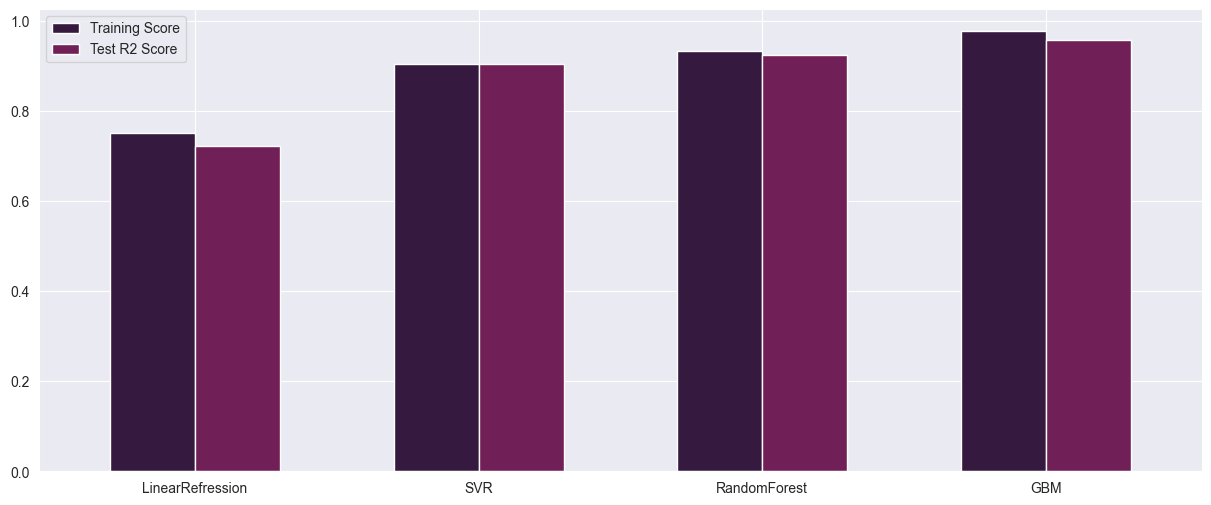

In [52]:
Modeling.plot(kind = "bar",figsize=(15,6),width=0.6)
plt.xticks(rotation=0)
plt.show()